- 문제 정의: 전국 강력 범죄 현황을 조사해 시각화. 지역별 범죄 현황을 알 수 있을 것 같다.  
  
- 데이터 선택: 공공데이터포탈에서 "경찰청_전국 경찰서별 강력범죄 발생 현황_20221231" 데이터를 활용. 각 지역별 강력 범죄 패턴을 확인할 수 있을 것으로 예상.

In [3]:
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("./경찰청_전국 경찰서별 강력범죄 발생 현황_20221231.csv")
df.head()

,발생년도,경찰서,살인,강도,절도,폭력
0,2022,서울중부서,1,3,910,1026
1,2022,서울종로서,2,5,723,847
2,2022,서울남대문서,0,2,455,480
3,2022,서울서대문서,5,6,1114,1092
4,2022,서울혜화서,0,3,590,740


In [5]:
# '경찰서' 열에서 앞의 두 글자만 추출하여 '지역' 열 생성
df['지역'] = df['경찰서'].str[:2]

# 필요한 특성 선택
selected_features = ['살인', '강도', '절도', '폭력']

# df_ori: 경찰서 열 삭제, 지역 열 추가한 데이터
df_ori = df[['지역'] + selected_features]

# df_agg: 지역으로 그룹화한 데이터
df_agg = df.groupby('지역')[selected_features].sum().reset_index()

print(df_ori)
print(df_agg)

     지역  살인  강도    절도    폭력
0    서울   1   3   910  1026
1    서울   2   5   723   847
2    서울   0   2   455   480
3    서울   5   6  1114  1092
4    서울   0   3   590   740
..   ..  ..  ..   ...   ...
253  경남   0   1   113   243
254  경남   0   0    66   127
255  제주   4   1   888  1392
256  제주   3   2   957  2113
257  제주   4   2  1281  1843

[258 rows x 5 columns]
    지역   살인   강도     절도     폭력
0   강원   26   19   4610   7268
1   경기  166  111  41539  63888
2   경남   44   29  12262  14833
3   경북   35   15   9846  10891
4   광주    3   10   5207   6283
5   대구   30   31   9787  11350
6   대전   17   17   6033   7758
7   부산   51   44  13688  17209
8   서울  104  117  37579  46783
9   세종    5    2   1110    912
10  울산   14   10   3272   5034
11  인천   50   30   8893  15276
12  전남   29   13   6152   8727
13  전북   33   11   5629   7018
14  제주   11    5   3126   5348
15  충남   43   25   7653   8833
16  충북   27   26   5747   7232


모든 강력 범죄(살인, 강도, 절도, 폭력)을 합친 값을 지역별로 그래프로 표시

C:\Users\SH\AppData\Local\Temp\ipykernel_17600\1680986887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori['Total_crimes'] = df_ori[selected_features].sum(axis=1)
C:\Users\SH\AppData\Local\Temp\ipykernel_17600\1680986887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori.dropna(axis=0, inplace=True)


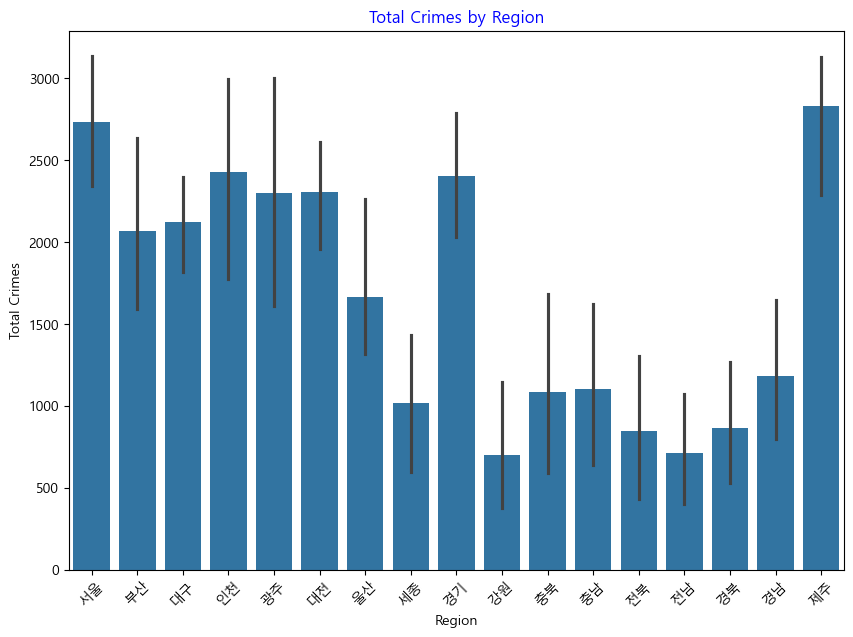

In [6]:
# 지역별 범죄 유형 합계 계산
df_ori['Total_crimes'] = df_ori[selected_features].sum(axis=1)

# 결측치 제거
df_ori.dropna(axis=0, inplace=True)

# 한글 깨지지 않게 하기 위해 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' #윈도우 기본 제공

# MAC에서 사용시 아래 'AppleGothic' 사용
# plt.rcParams['font.family'] = 'AppleGothic'

# 그래프 그리기
plt.figure(figsize=(10,7))
sns.barplot(x=df_ori.지역, y=df_ori['Total_crimes'])
plt.xticks(rotation=45)
plt.title('Total Crimes by Region', color='blue')
plt.xlabel('Region')
plt.ylabel('Total Crimes')
plt.show()

<Axes: xlabel='폭력'>

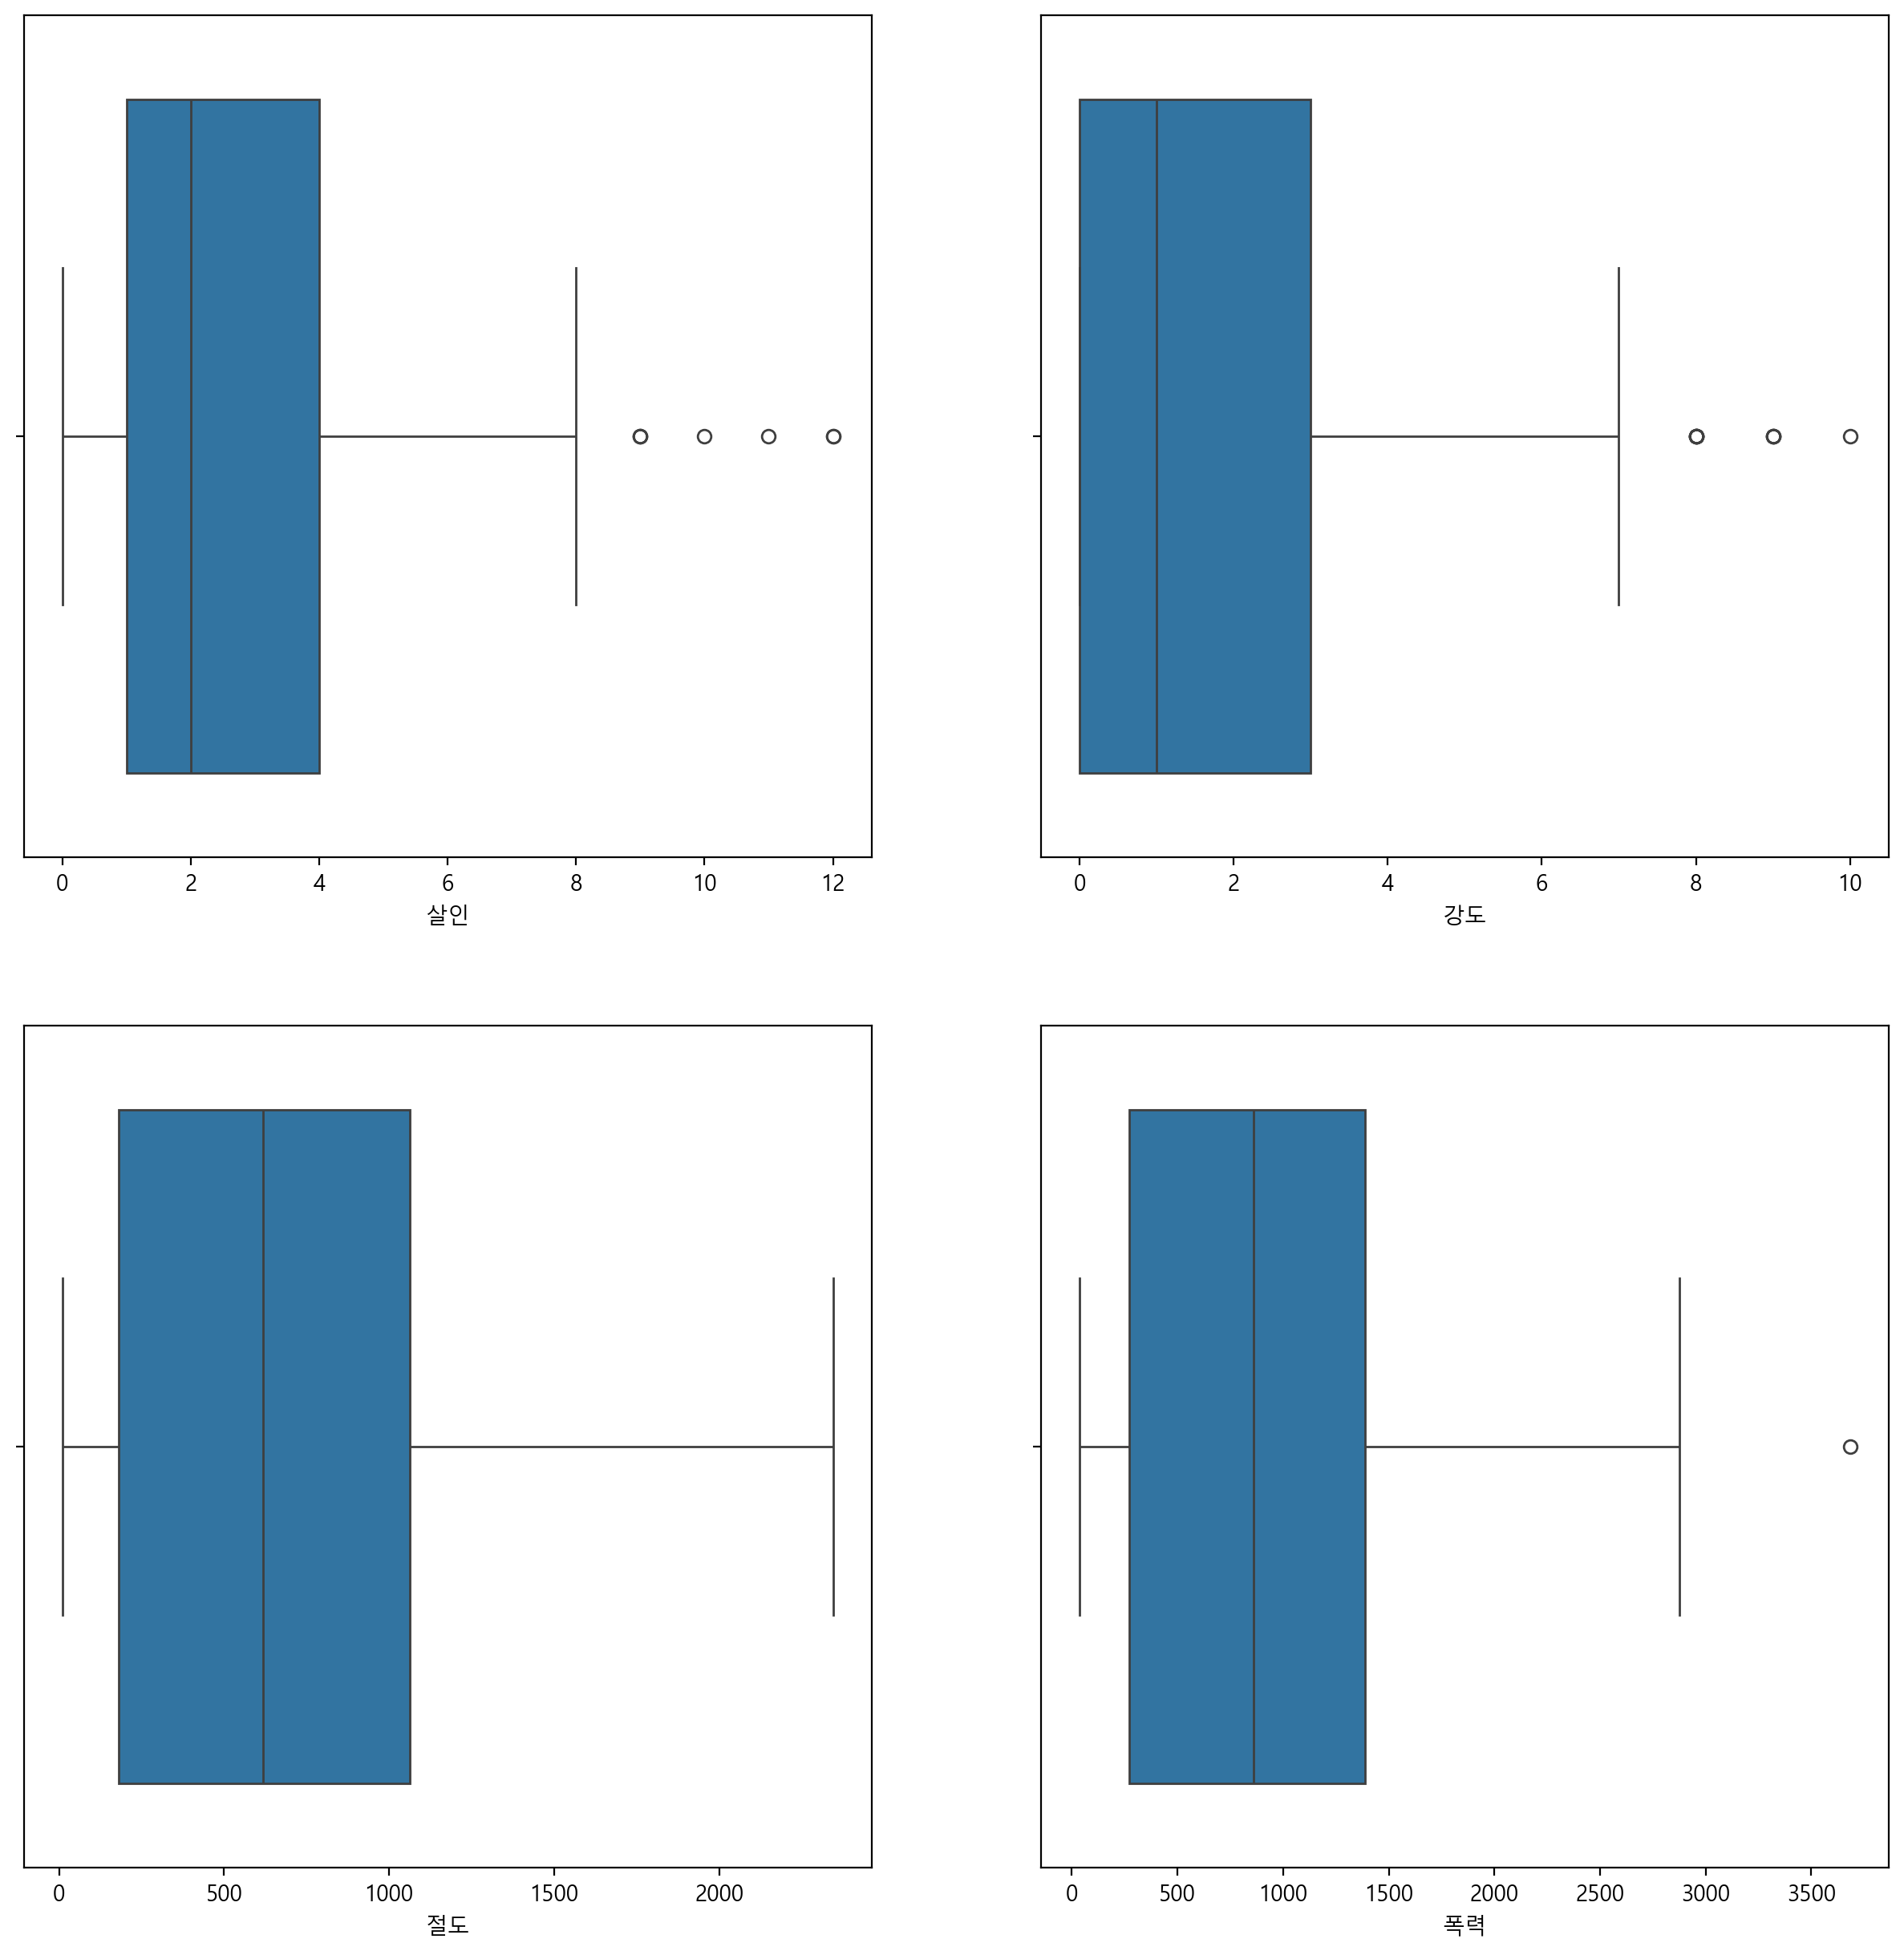

In [7]:
plt.figure(figsize=(15,15), dpi = 200) # 그림 크기를 가로 15, 세로 15인치로 설정

# 각 범죄를 지역별로 그룹화한 df_agg 데이터 사용
# subplot을 2행 2열로 설정
plt.subplot(2,2,1) 
sns.boxplot(x = '살인', data = df_ori)

plt.subplot(2,2,2)
sns.boxplot(x = '강도', data = df_ori)

plt.subplot(2,2,3)
sns.boxplot(x = '절도', data = df_ori)

plt.subplot(2,2,4)
sns.boxplot(x = '폭력', data = df_ori)


In [37]:
# 클러스터링에 사용될 열 선택 / 지역 열을 숫자 데이터로 인코딩

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

X = df_ori.loc[:, ('지역','살인','강도','절도','폭력')]

y = df_ori['지역']

X['지역'] = le.fit_transform(X['지역'])

y = le.transform(y)

In [38]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1])

In [40]:
# K-Means 클러스터링 알고리즘을 사용해 각 클러스터 개수에 따른 군집 내 제곱합(WCSS)을 계산
# Elbow 방법
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

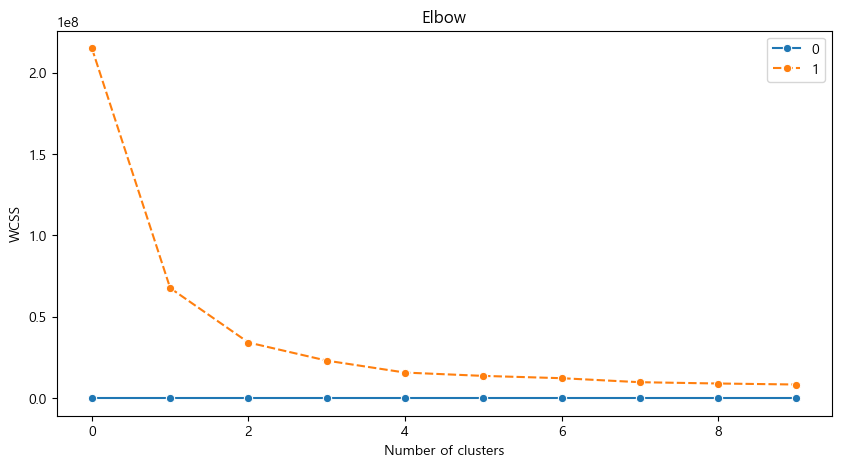

In [41]:
# Elbow 방법 결과 시각화
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

그래프를 보니 WCSS의 감속 속도가 크게 줄어드는 팔꿈치 부분은 클러스터 개수가 3일 때인 것을 알 수 있다.

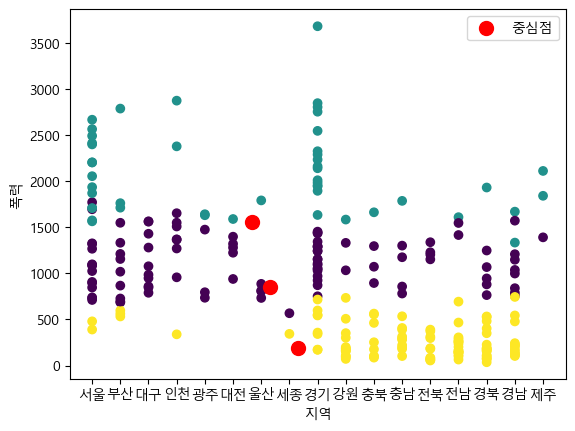

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(df_ori['지역'], df_ori['폭력'], c=labels)
plt.scatter(centers[:, 0], centers[:, 3], marker='o', s=100, color='red', label='중심점') #클러스터 중심점 표시
plt.xlabel('지역')
plt.ylabel('폭력')
plt.legend()
plt.show()


- 출력 결과는 위와 같다. 해당 산점도는 '경기'를 기준으로 왼쪽은 대체로 높게 밀집되어 있고, 오른쪽은 대체로 낮게 밀집되어 있다는 것을 알 수 있다. 
   
- 이 말은 '경기'를 기준으로 오른쪽 지역은 폭력 범죄 발생 비율이 낮은 행정 구역, 반대로 왼쪽 지역은 폭력 범죄 발생 비율이 높은 행정 구역이 소속되어 있다고 볼 수 있다.  
  
- 중심점은 빨간 점으로 표시했다. 마찬가지로 '높은 폭력 범죄 발생 클러스터'의 중심점은 왼쪽에, '낮은 폭력 범죄  발생 클러스터'들의 중심점은 상대적으로 오른쪽에 위치해 있다. 상대적인 위치이긴 하지만 폭력 범죄 발생 비율이 높은 지역이 왼쪽에, 낮은 지역은 오른쪽에 밀집해 있다는 것을 뒷받침해준다.

In [44]:
# 정확도 계산
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 31 out of 258 samples were correctly labeled.
Accuracy score: 0.12


In [45]:
# 실루엣 점수
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.56956636486115

- 실루엣 점수는 클러스터링 결과의 평가 지표 중 하나이며 -1에서 1 사이의 값을 가진다. 각 데이터 포인트가 같은 클러스터 내의 다른 데이터 포인트와 얼마나 비슷하고, 다른 클러스터의 데이터 포인트와 얼마나 다른지를 측정한다. 
실루엣 점수가 높을수록 클러스터링 결과가 좋음을 나타낸다.  
  
- 실루엣 점수가 0.57이므로 상대적으로 높은 값에 속하지만 1에 가까운 값이 아니라 더 개선의 여지가 있을 수 있으므로 다른 평가 지표와 함께 고려해 최종 결정을 내리는 것이 좋다.